In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from tensorflow.keras import layers
import os
import PIL
from PIL import Image

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator 




In [2]:
img = cv2.imread("PetImages/Dog/1616.jpg")
type(img)

numpy.ndarray

In [3]:
# path_cat = 'PetImages/Cat/'
current_dir = os.getcwd()
path_cat = 'PetImages/Cat/'
path_dog = 'PetImages/Dog/'
path_data = 'PetImages/'
path_graycat = 'PetImages/Cat/Cat/'
path_graydog = 'PetImages/Dog/Dog/'

error_dogs = ['10158.jpg','10747.jpg','11410.jpg','11702.jpg','11853.jpg','1866.jpg','2688.jpg','3136.jpg','3588.jpg','5604.jpg','6059.jpg','6718.jpg','8133.jpg','7459.jpg','8730.jpg','10401.jpg','10797.jpg','11675.jpg','11849.jpg','1308.jpg','2384.jpg','2877.jpg','3288.jpg','4367.jpg','6238.jpg','7112.jpg','7369.jpg','7969.jpg','9188.jpg','7133.jpg','Thumbs.db']
error_cats = ['10125.jpg','10501.jpg','11210.jpg','11874.jpg','140.jpg','3300.jpg','4833.jpg','660.jpg','7978.jpg','850.jpg','9565.jpg','10404.jpg','10820.jpg','11565.jpg','11935.jpg','2663.jpg','3491.jpg','5553.jpg','666.jpg','8470.jpg','9171.jpg','9778.jpg','936.jpg','7968.jpg','Thumbs.db']


In [4]:
#część zdjęć ma mniejszy rozmiar niż te 100x100, które wpisuję w modelu. Poniżej znajduję takie zdjęcia, wrzucam je do list

# min_width = float('inf')
# min_height = float('inf')

# def small_images_generator(folder_path):
#     for filename in os.listdir(folder_path):
#         image_path = os.path.join(folder_path, filename)
#         try:
#             image = Image.open(image_path)
#             width, height = image.size
#             if width < 100 or height < 100:
#                 yield filename
#         except (IOError, OSError):
#                 print(f"Nie można otworzyć pliku: {image_path}")    

# small_cats = []
# small_dogs = []
# for filename in small_images_generator(path_cat):
#     small_cats.append(filename)

# for filename in small_images_generator(path_dog):
#     small_dogs.append(filename)

# print(len(small_cats))
# print(len(small_dogs))

In [5]:
# zmieniamy kanał na RGM dla zdjęć, które miały inny kanał

# for filename in os.listdir(path_dog):
#     image_path = os.path.join(path_dog, filename)
#     try:
#         image = Image.open(image_path)
#         if channels not in ['3']:
#             image_rgb = image.convert("RGB")
#     except (IOError, OSError):
#         print(f"Nie można otworzyć pliku: {image_path}")

# for filename in os.listdir(path_cat):
#     image_path = os.path.join(path_cat, filename)
#     try:
#         image = Image.open(image_path)
#         if channels not in ['3']:
#             image_rgb = image.convert("RGB")
#     except (IOError, OSError):
#         print(f"Nie można otworzyć pliku: {image_path}")

In [6]:
def removing_files(list_of_files_to_delete,folder_path):
    for file in list_of_files_to_delete:
        file = folder_path + file
        try:
            os.remove(file)
            print(f"Plik '{file}' usunięty")
        except FileNotFoundError:
            print(f"Nie znaleziono pliku '{file}'")
        except PermissionError:
            print(f"PermissionError: '{file}'.")
        except Exception as e:
            print(f"Exception: '{file}': {str(e)}")

In [7]:
# tutaj usuwam pliki z tych list: error_dogs, error_cats, small_cats, small_dogs,
# dla każdej listy trzeba odpowiednio dobrać ścieżkę: path_cat, path_dog

# removing_files(error_dogs,path_dog)
# removing_files(small_dogs,path_dog)
# removing_files(error_cats,path_cat)
# removing_files(small_cats,path_cat)

In [8]:
# poniższe pętle konwertują wszystkie zdjęcia na kanał 3 - 'RGB'. Miałem problemy z fitowaniem, więc chciałem się upewnić, że wszystko jest 'RGB'

# for filename in os.listdir(path_dog):
#     image_path = os.path.join(path_dog, filename)
#     try:
#         image = Image.open(image_path)
#         image_gray = image.convert("RGB")
#         image_gray.save(image_path)
#     except (IOError, OSError):
#         print(f"Nie można otworzyć pliku: {image_path}")

# for filename in os.listdir(path_cat):
#     image_path = os.path.join(path_cat, filename)
#     try:
#         image = Image.open(image_path)
#         image_gray = image.convert("RGB")
#         image_gray.save(image_path)
#     except (IOError, OSError):
#         print(f"Nie można otworzyć pliku: {image_path}")

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    path_data,
    labels='inferred',
    batch_size=32,
    image_size=(100, 100),
    validation_split=0.2,
    subset = 'training',
    seed=123,
    # class_names=['Cat', 'Dog']
)


Found 24776 files belonging to 2 classes.
Using 19821 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    path_data,
    labels='inferred',
    batch_size=32,
    image_size=(100, 100),
    validation_split=0.2,
    subset = 'validation',
    seed=123,
    # class_names=['Cat', 'Dog']
)


Found 24776 files belonging to 2 classes.
Using 4955 files for validation.


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, depth=2)))

In [13]:
# data = []
# labels = []

In [14]:
# cat_images = os.listdir(path_cat)
# for image_name in cat_images:
#     try:
#         image_path = os.path.join(path_cat, image_name)
#         image = cv2.imread(image_path)
#         image = cv2.resize(image, (150, 150))
#         image = image.astype('float32') / 255.0
#         data.append(image)
#         labels.append('cat')
#     except:
#         pass


In [15]:
# dog_images = os.listdir(path_dog)
# for image_name in dog_images:
#     try:
#         image_path = os.path.join(path_dog, image_name)
#         image = cv2.imread(image_path)
#         image = cv2.resize(image, (150, 150))
#         image = image.astype('float32') / 255.0
#         data.append(image)
#         labels.append('dog')
#     except:
#         pass


In [16]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(100, 100, 3)))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
# Dodawanie warstw gęstych
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Warstwa wyjściowa z dwoma neuronami (kot i pies)


In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                    

In [19]:
# EarlyStopping - trzeba dodac w komórce niżej callback=es jesli chcemy go uzyc
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=4
)

In [ ]:
# 200 epoch, 0.3- dropout

In [20]:
results = model.fit(train_ds, epochs=200, validation_data=val_ds)

Epoch 1/200
620/620 [==============================] - 35s 49ms/step - loss: 0.6847 - accuracy: 0.5461 - val_loss: 0.6528 - val_accuracy: 0.6157
Epoch 2/200
620/620 [==============================] - 36s 58ms/step - loss: 0.6046 - accuracy: 0.6689 - val_loss: 0.5557 - val_accuracy: 0.7201
Epoch 3/200
620/620 [==============================] - 36s 57ms/step - loss: 0.5379 - accuracy: 0.7293 - val_loss: 0.5403 - val_accuracy: 0.7094
Epoch 4/200
620/620 [==============================] - 36s 58ms/step - loss: 0.4872 - accuracy: 0.7635 - val_loss: 0.4665 - val_accuracy: 0.7711
Epoch 5/200
620/620 [==============================] - 32s 52ms/step - loss: 0.4525 - accuracy: 0.7910 - val_loss: 0.4449 - val_accuracy: 0.8089
Epoch 6/200
620/620 [==============================] - 34s 55ms/step - loss: 0.4362 - accuracy: 0.7984 - val_loss: 0.4786 - val_accuracy: 0.7560
Epoch 7/200
620/620 [==============================] - 31s 50ms/step - loss: 0.4127 - accuracy: 0.8115 - val_loss: 0.4092 - val_ac

In [21]:
# Generate predictions for the validation dataset
y_pred = np.argmax(model.predict(val_ds), axis=1)

# Get true labels for the validation dataset
y_test = np.concatenate([y for x, y in val_ds], axis=0)
y_test = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=["Dog", "Cat"]))


155/155 [==============================] - 2s 11ms/step
              precision    recall  f1-score   support

         Dog       0.87      0.93      0.90      2429
         Cat       0.93      0.86      0.90      2526

    accuracy                           0.90      4955
   macro avg       0.90      0.90      0.90      4955
weighted avg       0.90      0.90      0.90      4955



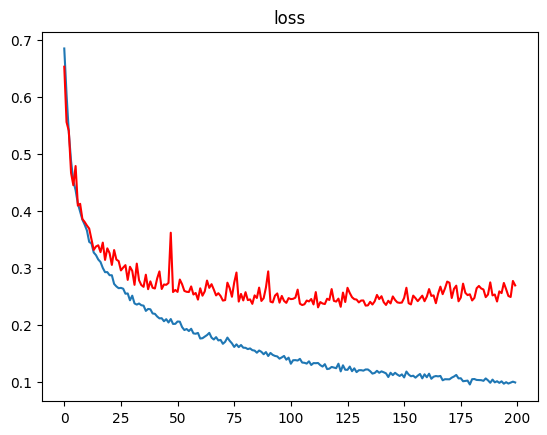

In [22]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"],'red')
plt.title("loss")
plt.show()

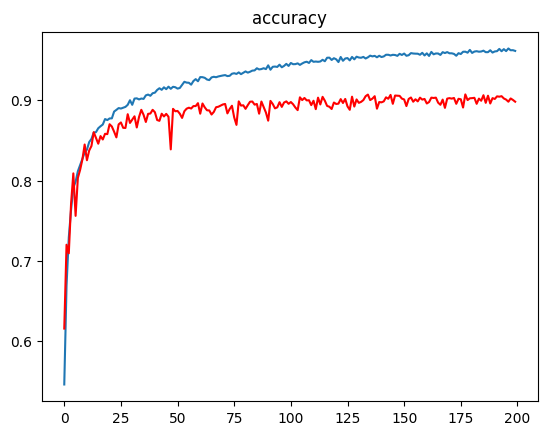

In [23]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"],'red')
plt.title("accuracy")
plt.show()